##**Monkeys classification**

####**Authors:** *Berlotti Mariaelena, Di Grande Sarah, Licciardello Cristina*

#### Loading Monkeys dataset

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Monkeys'

Archive:  /content/drive/MyDrive/Monkeys.zip
   creating: Monkeys/data/
   creating: Monkeys/data/n0/
  inflating: Monkeys/data/n0/n000.jpg  
  inflating: Monkeys/data/n0/n001.jpg  
  inflating: Monkeys/data/n0/n0010.jpg  
  inflating: Monkeys/data/n0/n0011.jpg  
  inflating: Monkeys/data/n0/n0012.jpg  
  inflating: Monkeys/data/n0/n0013.jpg  
  inflating: Monkeys/data/n0/n0014.jpg  
  inflating: Monkeys/data/n0/n0015.jpg  
  inflating: Monkeys/data/n0/n0016.jpg  
  inflating: Monkeys/data/n0/n0017.jpg  
  inflating: Monkeys/data/n0/n0018.jpg  
  inflating: Monkeys/data/n0/n0019.jpg  
  inflating: Monkeys/data/n0/n002.jpg  
  inflating: Monkeys/data/n0/n0020.jpg  
  inflating: Monkeys/data/n0/n0021.jpg  
  inflating: Monkeys/data/n0/n0022.jpg  
  inflating: Monkeys/data/n0/n0023.jpg  
  inflating: Monkeys/data/n0/n0024.jpg  
  inflating: Monkeys/data/n0/n0025.jpg  
  inflating: Monkeys/data/n0/n0026.jpg  
  inflating: Monkeys/data/n0/n0027.jpg  
  inflating: Monkeys/data/n0/n0028.jpg  

In [4]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [5]:
#We are showing the classes/categories:
import os
dest_dir = "/content/Monkeys/data/"
os.listdir(dest_dir)

['n2', 'n6', 'n8', 'n4', 'n0', 'n1', 'n9', 'n3', 'n7', 'n5']

In [6]:
dataset = torchvision.datasets.ImageFolder(root="/content/Monkeys/data")

Label: 3


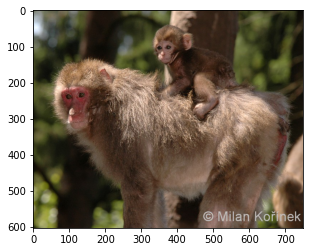

In [ ]:
image, label = dataset[500]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
dataset[6]

(<PIL.Image.Image image mode=RGB size=430x650 at 0x7FBCEDB65BD0>, 0)

In [7]:
from torchvision.transforms.transforms import RandomVerticalFlip
from torchvision import transforms

# Data transformations:
data_transform = transforms.Compose([
  transforms.Resize(size = (50,50)),
  transforms.RandomRotation(degrees=(0, 20)),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

# Loading dataset with transformations:
dataset_t = torchvision.datasets.ImageFolder(root="/content/Monkeys/data", transform=data_transform)


We tried also the following transformations:

*   transforms.RandomHorizontalFlip(),
*   transforms.RandomVerticalFlip(),
*   transforms.RandomAutocontrast(0.3)

However, we did not apply them since we obtained worst results in terms of accuracy.


In [8]:
#Splitting the dataset into training, validation and test:
torch.manual_seed(123)
train_set, val_set, test_set = torch.utils.data.random_split(dataset_t, [969, 200, 200])

In [9]:
# Dataset length:
num_train = len(train_set)
num_test = len(test_set)
num_val = len(val_set)
print(f"Num. training samples: {num_train}")
print(f"Num. test samples: {num_test}")
print(f"Num. validation samples: {num_val}")

Num. training samples: 969
Num. test samples: 200
Num. validation samples: 200


In [ ]:
#Image shape:
data, label = train_set[0]
print(data.shape)

torch.Size([3, 50, 50])


In [10]:
from torch.utils.data import Dataset, DataLoader

In [13]:
train_loader = DataLoader(train_set, batch_size=10, shuffle=True, drop_last=True, num_workers=1)
val_loader = DataLoader(val_set, batch_size=10, shuffle=False, drop_last=False, num_workers=1)
test_loader = DataLoader(test_set, batch_size=10, shuffle=False, drop_last=False, num_workers=1)

####First network
####1 Conv layer + 2 Conv layer + 3 Conv layer + 4 Conv layer + 1 FC + Final Classifier:

In [16]:
import torch.nn as nn

class CNN1(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=2, padding=0, stride=1),
        nn.ReLU()     
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x

In [17]:
# Create the model
model1 = CNN1()
print(model1)

CNN1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(2, 2), stride=(1, 1))
    (11): ReLU()
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [ ]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [ ]:
output = model1 (test_x)
output.shape

torch.Size([1, 512, 8, 8])

In [ ]:
# The real dimension of the feature vector that we want to give to the fully connnected layers is given by the multiplication of the output sizes:
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

32768


In [ ]:
out_1 = output.size(1)*output.size(2)

In [ ]:
class CNN1(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=2, padding=0, stride=1),
        nn.ReLU()
        
    )

    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # FC layer 1
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        nn.Dropout(p=0.5), 
        # Final Classification Layer
        nn.Linear(out_1, 10), # in the dataset we have ten classes
        nn.Softmax(dim = 1)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
                           
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
# Create the model
model1 = CNN1()
output = model1(test_x)
output.shape

torch.Size([1, 10])

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

CNN1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(2, 2), stride=(1, 1))
    (11): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=32768, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.2992, TrA=0.1490, VL=2.2907, VA=0.2100, TeL=2.2922, TeA=0.1900,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.2822, TrA=0.1708, VL=2.2536, VA=0.2050, TeL=2.2562, TeA=0.1950,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=2.2289, TrA=0.2219, VL=2.2021, VA=0.2300, TeL=2.1978, TeA=0.2350,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: TrL=2.1741, TrA=0.2938, VL=2.1440, VA=0.3500, TeL=2.1557, TeA=0.3150,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5: TrL=2.1192, TrA=0.3604, VL=2.0899, VA=0.3950, TeL=2.0699, TeA=0.4100,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6: TrL=2.0650, TrA=0.4250, VL=2.0217, VA=0.4800, TeL=1.9932, TeA=0.5100,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 7: TrL=2.0236, TrA=0.4510, VL=2.0254, VA=0.4550, TeL=1.9974, TeA=0.5000,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8: TrL=1.9908, TrA=0.4958, VL=1.9734, VA=0.5100, TeL=1.9707, TeA=0.5000,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9: TrL=1.9534, TrA=0.5240, VL=1.9806, VA=0.4950, TeL=1.9557, TeA=0.5300,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10: TrL=1.9283, TrA=0.5563, VL=1.9608, VA=0.5000, TeL=1.9507, TeA=0.5200,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 11: TrL=1.9114, TrA=0.5698, VL=1.9543, VA=0.5250, TeL=1.9484, TeA=0.5150,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 12: TrL=1.8983, TrA=0.5698, VL=1.9640, VA=0.4750, TeL=1.9512, TeA=0.5100,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 13: TrL=1.8981, TrA=0.5729, VL=1.9412, VA=0.5100, TeL=1.9163, TeA=0.5550,


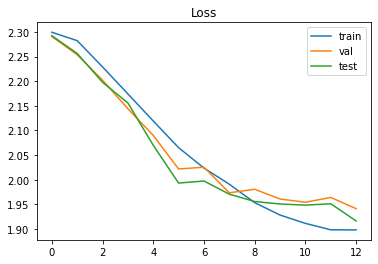

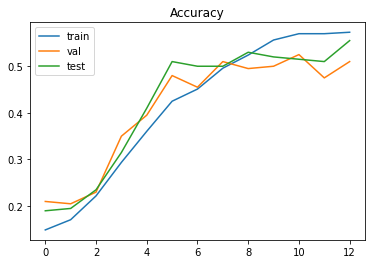

In [ ]:
net = CNN1()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

train(net, loaders, optimizer, criterion, epochs=13,  save_param = True, dev=device)

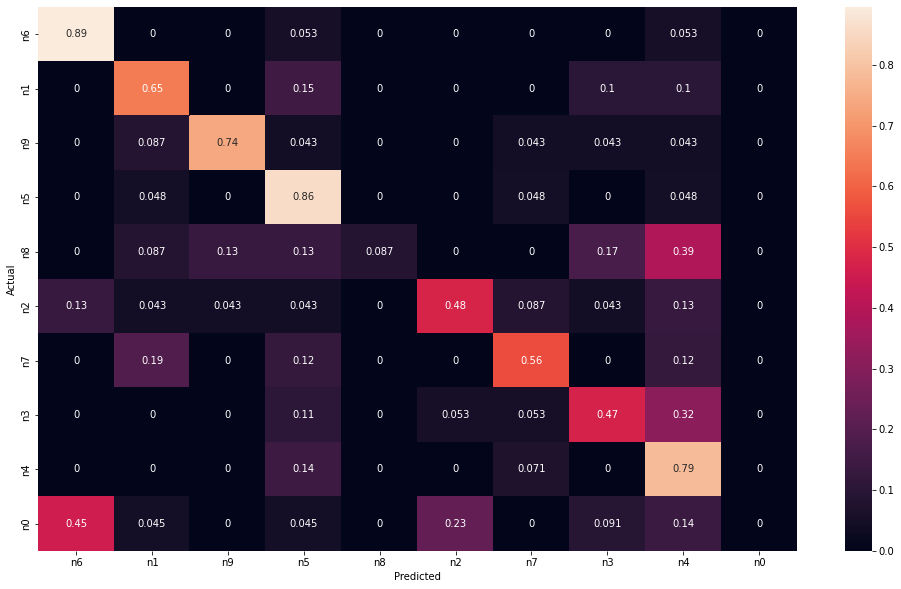

In [ ]:
#Confusion matrix:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import numpy as np

y_pred = []
y_actual = []

# iterate over test data
for inputs, labels in test_loader:
  inputs, labels = inputs.cpu(), labels.cpu()
  output = net(inputs) # Feed Network
  output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
  y_pred.extend(output) # Save Prediction
  
  labels = labels.data.cpu().numpy()
  y_actual.extend(labels) # Save Truth

# constant for classes
classes = os.listdir(dest_dir)

# Build confusion matrix
cm = confusion_matrix(y_actual, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(cmn, annot=True, xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False) 

####Trials
1st Conv layer + 2nd Conv layer + 3rd Conv layer + 4th Conv layer + 5th Conv layer + FC + Classifier:

In [ ]:
import torch.nn as nn

class CNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        ## Layer 5
        nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x

In [ ]:
# Create the model
model_1 = CNN()
print(model_1 )

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(2, 2), stride=(1, 1))
    (11): ReLU()
    (12): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [ ]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [ ]:
output = model_1 (test_x)
output.shape

torch.Size([1, 1024, 3, 3])

In [ ]:
# The real dimension of the feature vector that we want to give to the fully connnected layers is given by the multiplication of the output sizes:
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

9216


In [ ]:
class CNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        ## Layer 5
        nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # FC layer 1
        nn.Linear(9216, 2560),
        nn.ReLU(),
        nn.Dropout(p=0.5), 
        # Final Classification Layer
        nn.Linear(2560, 10), # in the dataset we have ten classes
        nn.Softmax(dim = 1)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
                           
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
# Create the model
model_1 = CNN()
output = model_1(test_x)
output.shape

torch.Size([1, 10])

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(2, 2), stride=(1, 1))
    (11): ReLU()
    (12): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=9216, out_features=2560, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)

train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.3023, TrA=0.1073, VL=2.3021, VA=0.1600, TeL=2.3020, TeA=0.1200,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.3015, TrA=0.1656, VL=2.3013, VA=0.1600, TeL=2.3013, TeA=0.1500,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=2.3005, TrA=0.1854, VL=2.3003, VA=0.1600, TeL=2.3006, TeA=0.2200,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: TrL=2.2996, TrA=0.2302, VL=2.2992, VA=0.2850, TeL=2.2997, TeA=0.2700,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5: TrL=2.2983, TrA=0.2573, VL=2.2978, VA=0.2800, TeL=2.2987, TeA=0.2700,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6: TrL=2.2971, TrA=0.2729, VL=2.2963, VA=0.2450, TeL=2.2973, TeA=0.2500,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 7: TrL=2.2953, TrA=0.2458, VL=2.2935, VA=0.2450, TeL=2.2951, TeA=0.2400,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8: TrL=2.2925, TrA=0.2094, VL=2.2902, VA=0.2150, TeL=2.2921, TeA=0.1850,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9: TrL=2.2875, TrA=0.1865, VL=2.2826, VA=0.2000, TeL=2.2855, TeA=0.1600,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10: TrL=2.2759, TrA=0.1729, VL=2.2643, VA=0.2000, TeL=2.2688, TeA=0.1600,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 11: TrL=2.2512, TrA=0.1750, VL=2.2306, VA=0.2000, TeL=2.2404, TeA=0.1650,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 12: TrL=2.2253, TrA=0.1844, VL=2.2076, VA=0.2150, TeL=2.2187, TeA=0.1800,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 13: TrL=2.2074, TrA=0.2490, VL=2.1812, VA=0.2750, TeL=2.1974, TeA=0.2450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 14: TrL=2.1757, TrA=0.2854, VL=2.1522, VA=0.3200, TeL=2.1712, TeA=0.2800,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 15: TrL=2.1455, TrA=0.3146, VL=2.1338, VA=0.3200, TeL=2.1508, TeA=0.3050,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 16: TrL=2.1211, TrA=0.3510, VL=2.1105, VA=0.3400, TeL=2.1354, TeA=0.3050,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 17: TrL=2.0956, TrA=0.3635, VL=2.0886, VA=0.3700, TeL=2.0949, TeA=0.3200,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 18: TrL=2.0703, TrA=0.3990, VL=2.0752, VA=0.3750, TeL=2.0769, TeA=0.3750,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 19: TrL=2.0540, TrA=0.4198, VL=2.0873, VA=0.3750, TeL=2.0576, TeA=0.4200,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 20: TrL=2.0372, TrA=0.4417, VL=2.0535, VA=0.4150, TeL=2.0353, TeA=0.4400,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 21: TrL=2.0102, TrA=0.4667, VL=2.0398, VA=0.4250, TeL=2.0213, TeA=0.4750,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 22: TrL=1.9963, TrA=0.4823, VL=2.0260, VA=0.4350, TeL=2.0284, TeA=0.4400,


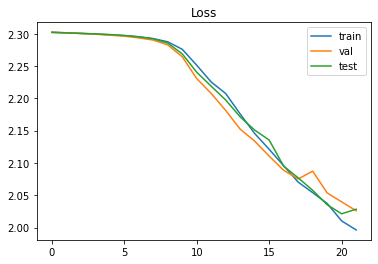

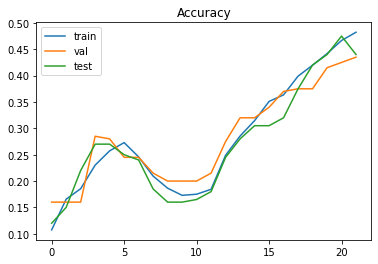

In [ ]:
net = CNN()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}
"""
Early stopping 22 epochs.
"""
train(net, loaders, optimizer, criterion, epochs=22,  save_param = True, dev=device)

1st Conv layer + 2nd Conv layer + 3rd Conv layer + FC + Classifier:

In [ ]:
class CNN2(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=0, stride=1),
        nn.ReLU()           
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x


In [ ]:
# Create the model
model2 = CNN2()
print(model2)

CNN2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
    (9): ReLU()
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [ ]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [ ]:
output = model2(test_x)
output.shape

torch.Size([1, 256, 9, 9])

In [ ]:
# The real dimension of the feature vector that we want to give to the fully connnected layers is given by the multiplication of the output sizes:
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

20736


In [ ]:
out_1 = output.size(1)*output.size(2)

In [ ]:
class CNN2(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, padding=0, stride=1),
        nn.ReLU(),
             
    )

    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # FC layer 1
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        nn.Dropout(p=0.5), 
        # Final Classification Layer
        nn.Linear(out_1, 10), # in the dataset we have ten classes
        nn.Softmax(dim = 1)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
                           
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
# Create the model
model2 = CNN2()
output = model2(test_x)
output.shape

torch.Size([1, 10])

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

CNN2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
    (9): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=20736, out_features=2304, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=2304, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.2843, TrA=0.1458, VL=2.2459, VA=0.2550, TeL=2.2415, TeA=0.2450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.2000, TrA=0.3000, VL=2.1458, VA=0.3350, TeL=2.1498, TeA=0.2950,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=2.1028, TrA=0.3948, VL=2.0671, VA=0.4150, TeL=2.0674, TeA=0.4050,


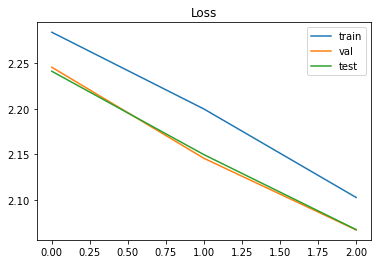

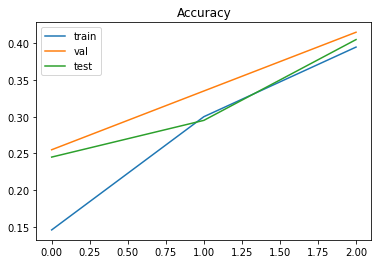

In [ ]:
net = CNN2()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

"""
Early stopping epoch 3.
"""

train(net, loaders, optimizer, criterion, epochs=3,  save_param = True, dev=device)

1st Conv layer + 2nd Conv layer + FC + Classifier:

In [ ]:
class CNN3(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),
                 
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x


In [ ]:
# Create the model
model3 = CNN3()
print(model3)

CNN3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [ ]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [ ]:
output = model3(test_x)
output.shape

torch.Size([1, 128, 10, 10])

In [ ]:
# The real dimension of the feature vector that we want to give to the fully connnected layers is given by the multiplication of the output sizes:
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

12800


In [ ]:
out_1 = output.size(1)*output.size(2)

In [ ]:
class CNN3(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2, stride=2),                  
    )

    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # FC layer 1
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        nn.Dropout(p=0.5), 
        # Final Classification Layer
        nn.Linear(out_1, 10), # in the dataset we have ten classes
        nn.Softmax(dim = 1)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
                           
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
# Create the model
model3 = CNN3()
output = model3(test_x)
output.shape

torch.Size([1, 10])

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

CNN3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=12800, out_features=1280, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1280, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.2174, TrA=0.2396, VL=2.1068, VA=0.4250, TeL=2.0765, TeA=0.4450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.0303, TrA=0.4750, VL=1.9984, VA=0.4900, TeL=1.9629, TeA=0.5350,


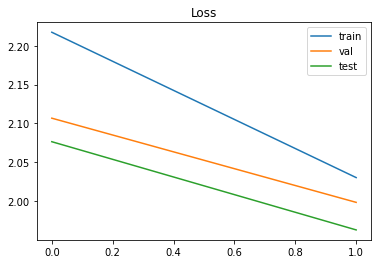

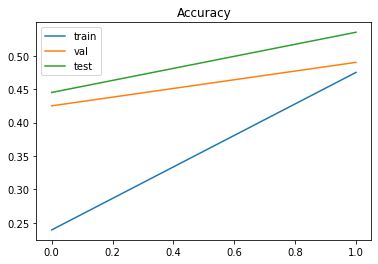

In [ ]:
#early stopping epoch=2
net = CNN3()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}
"""
Early stopping epoch 2.
"""

train(net, loaders, optimizer, criterion, epochs=2,  save_param = True, dev=device)

1st Conv layer + FC + Classifier:

In [18]:
class CNN4(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),        
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x


In [19]:
# Create the model
model4 = CNN4()
print(model4)

CNN4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [20]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [21]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [22]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [23]:
output = model4(test_x)
output.shape

torch.Size([1, 64, 23, 23])

In [24]:
# The real dimension of the feature vector that we want to give to the fully connnected layers is given by the multiplication of the output sizes:
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

33856


In [25]:
out_1 = output.size(1)*output.size(2)

In [26]:
class CNN4(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),                      
    )

    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # FC layer 1
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        nn.Dropout(p=0.5), 
        # Final Classification Layer
        nn.Linear(out_1, 10), # in the dataset we have ten classes
        nn.Softmax(dim = 1)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
                           
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [27]:
# Create the model
model4 = CNN4()
output = model4(test_x)
output.shape

torch.Size([1, 10])

In [28]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [29]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

CNN4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=33856, out_features=1472, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1472, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.1663, TrA=0.3042, VL=2.0864, VA=0.3700, TeL=2.0535, TeA=0.4250,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.0055, TrA=0.4812, VL=2.0117, VA=0.4550, TeL=1.9824, TeA=0.4900,


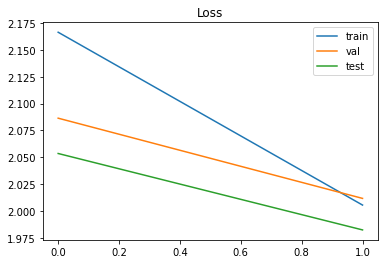

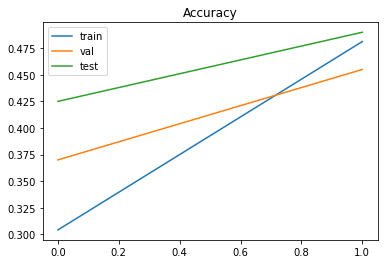

In [30]:
net = CNN4()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

train(net, loaders, optimizer, criterion, epochs=2,  save_param = True, dev=device)

####Second Network:
1 Conv layer + 2 Conv layer + 1 FC + 2 FC + final classifier

In [31]:
import torch.nn as nn

class SimpleCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x

In [32]:
# Create the model
model_2 = SimpleCNN()
print(model_2)

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [33]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [34]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [35]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [36]:
output = model_2(test_x)
output.shape

torch.Size([1, 128, 22, 22])

In [37]:
out_1=output.size(1)*output.size(2)
out_1

2816

In [38]:
# the real dimension of the feature vector that we want to give to the fully connnected layers 
# is given by the multiplication of the output sizes.
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

61952


In [39]:
class SimpleCNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        # a second FC layer
        nn.Linear(out_1, 1024),
        # the final Classification Layer
        nn.Linear(1024, 10) 
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)                          
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [40]:
# Create the model
model_2 = SimpleCNN()
output = model_2(test_x)
output.shape

torch.Size([1, 10])

In [41]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [42]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=61952, out_features=2816, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2816, out_features=1024, bias=True)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.2619, TrA=0.1854, VL=2.1800, VA=0.2650, TeL=2.1610, TeA=0.2700,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.0218, TrA=0.3042, VL=1.8737, VA=0.3550, TeL=1.8433, TeA=0.3850,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=1.8075, TrA=0.3708, VL=1.7768, VA=0.3600, TeL=1.7916, TeA=0.3750,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: TrL=1.6362, TrA=0.4448, VL=1.6513, VA=0.4300, TeL=1.6250, TeA=0.4550,


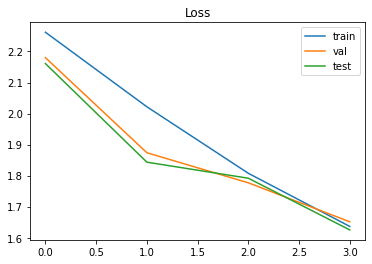

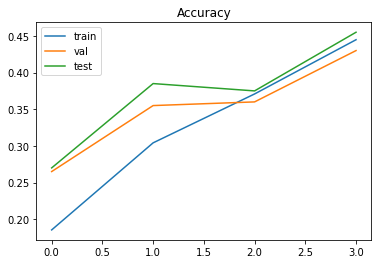

In [ ]:
net = SimpleCNN()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

"""
Early stopping epoch 4.
"""

train(net, loaders, optimizer, criterion, epochs=4,  save_param = True, dev=device)

###Trials

1st Conv layer + 1 FC + 2 FC + final classifier:

In [43]:
import torch.nn as nn

class SecondCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU()
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x

In [44]:
# Create the model
model_3 = SecondCNN()
print(model_3)

SecondCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
  )
)


In [45]:
# Get an element from the dataset
test_x, _ = train_set[0]

In [46]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [47]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [48]:
output = model_3(test_x)
output.shape

torch.Size([1, 64, 46, 46])

In [49]:
out_1 =output.size(1)*output.size(2)
out_1

2944

In [50]:
#the real dimension of the feature vector that we want to give to the fully connnected layers 
# is given by the multiplication of the output sizes.
out_features = output.size(1)*output.size(2)*output.size(3)
print(out_features)

135424


In [51]:
class SecondCNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU()     
    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        #first FC layer
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        #second FC layer
        nn.Linear(out_1, 1024),
        # the final Classification Layer
        nn.Linear(1024, 10) 
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)                          
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [52]:
# Create the model
model_3 = SecondCNN()
output = model_3(test_x)
output.shape

torch.Size([1, 10])

In [53]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [54]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

SecondCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=135424, out_features=2944, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2944, out_features=1024, bias=True)
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.0780, TrA=0.2563, VL=1.8803, VA=0.3150, TeL=1.7966, TeA=0.3500,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=1.7015, TrA=0.4094, VL=1.5804, VA=0.3850, TeL=1.6039, TeA=0.3950,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=1.4258, TrA=0.5000, VL=1.4863, VA=0.4700, TeL=1.3855, TeA=0.5050,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: TrL=1.2299, TrA=0.5917, VL=1.4653, VA=0.5100, TeL=1.4265, TeA=0.4950,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5: TrL=1.0618, TrA=0.6396, VL=1.4725, VA=0.5300, TeL=1.3607, TeA=0.5250,


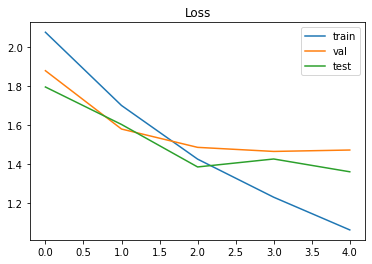

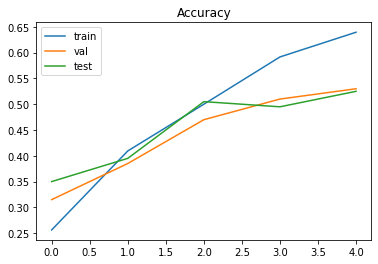

In [55]:
net = SecondCNN()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

train(net, loaders, optimizer, criterion, epochs=5,  save_param = True, dev=device)

1st + 2nd + 3rd Conv layers + 1 FC + 2 FC + final classifier:

In [56]:
import torch.nn as nn

class ThirdCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x

In [57]:
# Create the model
model_4 = ThirdCNN()
print(model_4)

ThirdCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [58]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [59]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [60]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [61]:
output = model_4(test_x)
output.shape

torch.Size([1, 256, 10, 10])

In [62]:
out_1=output.size(1)*output.size(2)
out_1

2560

In [63]:
# the real dimension of the feature vector that we want to give to the fully connnected layers 
# is given by the multiplication of the output sizes.
out_features = output.size(1)*output.size(2)* output.size(3)
print(out_features)

25600


In [64]:
class ThirdCNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # first FC layer
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        #second FC layer
        nn.Linear(out_1, out_1),
        # Final Classification Layer
        nn.Linear(out_1, 10) 
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1)
    output = self.fc_layers(x) 
    return output

In [65]:
# Create the model
model_4 = ThirdCNN()
output = model_4(test_x)
output.shape

torch.Size([1, 10])

In [66]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [67]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

ThirdCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=25600, out_features=2560, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2560, out_features=2560, bias=True)
    (3): Linear(in_features=2560, out_features=10, bias=True)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.2998, TrA=0.1302, VL=2.2960, VA=0.1750, TeL=2.2953, TeA=0.2300,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.2879, TrA=0.1948, VL=2.2793, VA=0.2450, TeL=2.2774, TeA=0.2450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=2.2538, TrA=0.2229, VL=2.2132, VA=0.2250, TeL=2.2038, TeA=0.2500,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: TrL=2.1172, TrA=0.2833, VL=2.0332, VA=0.2950, TeL=1.9612, TeA=0.3100,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5: TrL=1.9277, TrA=0.3000, VL=1.8977, VA=0.3500, TeL=1.8337, TeA=0.3450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6: TrL=1.8338, TrA=0.3375, VL=1.7961, VA=0.3650, TeL=1.7356, TeA=0.4000,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 7: TrL=1.7424, TrA=0.4010, VL=1.8954, VA=0.2900, TeL=1.7539, TeA=0.3600,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8: TrL=1.6455, TrA=0.4385, VL=1.7267, VA=0.4000, TeL=1.6820, TeA=0.3800,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9: TrL=1.5157, TrA=0.4917, VL=1.7169, VA=0.4050, TeL=1.6669, TeA=0.3850,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10: TrL=1.4155, TrA=0.5344, VL=1.6722, VA=0.4500, TeL=1.5897, TeA=0.4350,


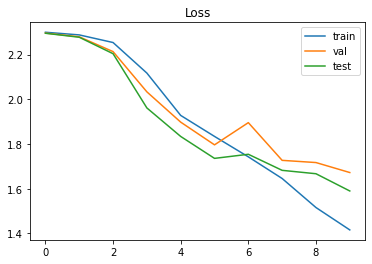

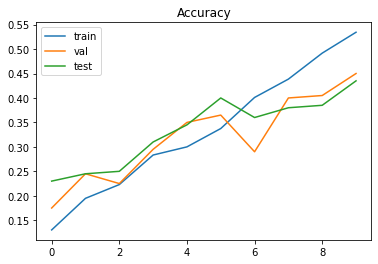

In [71]:
import torch
import torch.nn.functional as F
import torch.optim as optim

net = ThirdCNN()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

train(net, loaders, optimizer, criterion, epochs=10,  save_param = True, dev=device)

1st + 2nd + 3rd + 4th Conv layers + FC + Classifier:

In [72]:
import torch.nn as nn

class FourthCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x)
    return x

In [73]:
# Create the model
model_5 = FourthCNN()
print(model_5)

FourthCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [74]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [75]:
# Get the size of a sample
test_x.size()

torch.Size([3, 50, 50])

In [76]:
test_x = test_x.unsqueeze(dim=0) 
test_x.size()

torch.Size([1, 3, 50, 50])

In [77]:
output = model_5(test_x)
output.shape

torch.Size([1, 512, 4, 4])

In [78]:
out_1=output.size(1)*output.size(2)
out_1

2048

In [79]:
# the real dimension of the feature vector that we want to give to the fully connnected layers 
# is given by the multiplication of the output sizes.
out_features = output.size(1)*output.size(2)* output.size(3)
print(out_features)

8192


In [80]:
class FourthCNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        #first FC layer
        nn.Linear(out_features, out_1),
        nn.ReLU(),
        #second FC layer
        nn.Linear(out_1, out_1),
        # the final Classification Layer
        nn.Linear(out_1, 10) # in the dataset we have ten classes
    )

  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [81]:
# Create the model
model_5 = FourthCNN()
output = model_5(test_x)
output.shape

torch.Size([1, 10])

In [82]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [83]:
import matplotlib.pyplot as plt

def train(net, loaders, optimizer, criterion, epochs=100,  save_param = False, dev=torch.device('cpu')):
    try:
        net = net.to(dev)
        print(net)
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()

FourthCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=8192, out_features=2048, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2048, out_features=2048, bias=True)
    (3): Linear(in_features=2048, out_features=10, bias=True)
  )
)


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1: TrL=2.3024, TrA=0.1010, VL=2.3035, VA=0.0800, TeL=2.3026, TeA=0.0700,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 2: TrL=2.3009, TrA=0.1104, VL=2.3031, VA=0.1500, TeL=2.3020, TeA=0.1250,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 3: TrL=2.2994, TrA=0.1198, VL=2.3025, VA=0.1650, TeL=2.3016, TeA=0.1450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 4: TrL=2.2980, TrA=0.1490, VL=2.3015, VA=0.1650, TeL=2.3004, TeA=0.1450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 5: TrL=2.2965, TrA=0.1646, VL=2.2998, VA=0.1650, TeL=2.2983, TeA=0.1450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 6: TrL=2.2935, TrA=0.1812, VL=2.2971, VA=0.1450, TeL=2.2954, TeA=0.1350,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 7: TrL=2.2890, TrA=0.1562, VL=2.2909, VA=0.1300, TeL=2.2891, TeA=0.1300,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 8: TrL=2.2809, TrA=0.1729, VL=2.2791, VA=0.1950, TeL=2.2763, TeA=0.1800,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 9: TrL=2.2624, TrA=0.1875, VL=2.2495, VA=0.2050, TeL=2.2435, TeA=0.2000,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 10: TrL=2.2148, TrA=0.2125, VL=2.1593, VA=0.2550, TeL=2.1518, TeA=0.2600,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 11: TrL=2.0647, TrA=0.2646, VL=2.0152, VA=0.2600, TeL=2.0118, TeA=0.2350,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 12: TrL=1.9440, TrA=0.3104, VL=1.9110, VA=0.3200, TeL=1.8720, TeA=0.3450,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 13: TrL=1.8995, TrA=0.3115, VL=1.8843, VA=0.2900, TeL=1.8645, TeA=0.3200,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 14: TrL=1.8552, TrA=0.3531, VL=1.8678, VA=0.3150, TeL=1.8273, TeA=0.3550,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 15: TrL=1.8026, TrA=0.3813, VL=1.7939, VA=0.3800, TeL=1.7608, TeA=0.3750,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 16: TrL=1.7263, TrA=0.3948, VL=1.8173, VA=0.3650, TeL=1.6917, TeA=0.3650,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 17: TrL=1.6570, TrA=0.4219, VL=1.7523, VA=0.3850, TeL=1.6132, TeA=0.4250,


train:   0%|          | 0/96 [00:00<?, ?it/s]

val:   0%|          | 0/20 [00:00<?, ?it/s]

test:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 18: TrL=1.5778, TrA=0.4292, VL=1.6810, VA=0.3950, TeL=1.5710, TeA=0.4450,


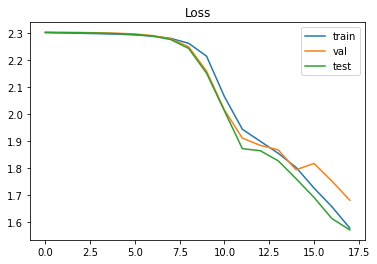

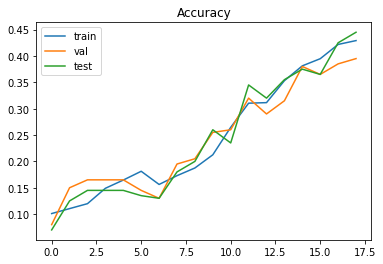

In [84]:
net = FourthCNN()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

# Define dictionary of loaders
loaders = {"train": train_loader,
           "val": val_loader,
           "test": test_loader}

train(net, loaders, optimizer, criterion, epochs=18,  save_param = True, dev=device)

##AlexNet

In [ ]:
from torchvision import transforms

# Compose transformations
data_transform2 = transforms.Compose([
  transforms.Resize(size = (227,227)),
  transforms.RandomRotation(degrees=(0, 20)),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])
# Load dataset with transforms
dataset_t2 = torchvision.datasets.ImageFolder(root="/content/Monkeys/data", transform=data_transform2)

In [ ]:
torch.manual_seed(123)
train_set2, val_set2, test_set2 = torch.utils.data.random_split(dataset_t2, [969, 200, 200])

In [ ]:
data, label = train_set2[0]
print(data.shape)

torch.Size([3, 227, 227])


In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_loader2 = DataLoader(train_set2, batch_size=10, shuffle=True, drop_last=True, num_workers=1)
val_loader2 = DataLoader(val_set2, batch_size=10, shuffle=False, drop_last=False, num_workers=1)
test_loader2 = DataLoader(test_set2, batch_size=10, shuffle=False, drop_last=False, num_workers=1)

In [ ]:
import torchvision.models as models
#setup device to use the GPU
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

cuda


In [ ]:
alexnet_model = models.alexnet().to(dev)
print (alexnet_model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for name, param in alexnet_model.named_parameters():
    print(name, param.shape)

features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([1000, 4096])
classifier.6.bias torch.Size([1000])


In [ ]:
from torchsummary import summary

summary(alexnet_model, (3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]          23,296
              ReLU-2           [-1, 64, 56, 56]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader

# Define the dictionary of loaders
loaders2 = {"train": DataLoader(train_set2, batch_size=64, shuffle=True, drop_last=True, num_workers=2),
            "val": DataLoader(val_set2, batch_size=64, shuffle=True, drop_last=True, num_workers=2),
           "test": DataLoader(test_set2, batch_size=64, shuffle=False, drop_last=False, num_workers=2)}
# Define an optimizer
optimizer = optim.SGD(alexnet_model.parameters(), lr = 0.05)
# Define a loss
criterion = nn.CrossEntropyLoss()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1: TrL=6.8543, TrA=0.0823, VL=6.7783, VA=0.0833, TeL=6.7782, TeA=0.1172,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2: TrL=8299856156704334848.0000, TrA=0.1000, VL=nan, VA=0.0938, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3: TrL=nan, TrA=0.0969, VL=nan, VA=0.0938, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4: TrL=nan, TrA=0.0958, VL=nan, VA=0.0990, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5: TrL=nan, TrA=0.0969, VL=nan, VA=0.0885, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6: TrL=nan, TrA=0.0958, VL=nan, VA=0.0938, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7: TrL=nan, TrA=0.0948, VL=nan, VA=0.0990, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8: TrL=nan, TrA=0.0969, VL=nan, VA=0.0990, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9: TrL=nan, TrA=0.0958, VL=nan, VA=0.0938, TeL=nan, TeA=0.0742,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10: TrL=nan, TrA=0.0948, VL=nan, VA=0.0885, TeL=nan, TeA=0.0742,


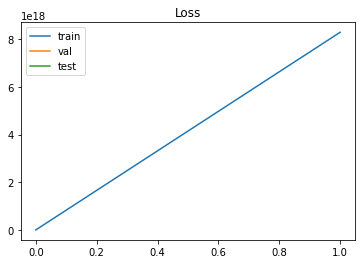

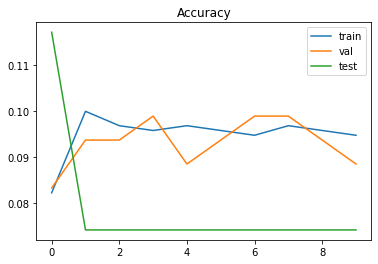

In [ ]:
train (alexnet_model, loaders2, optimizer, criterion, epochs = 10, dev = dev)

###Fine Tuning

In [ ]:
pt_alexnet_model = models.alexnet(pretrained = True).to(dev)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
pt_alexnet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# First, we set require_grad = False for all the layer of the net
for param in pt_alexnet_model.parameters():
  param.requires_grad = False

In [ ]:
# Then, we replace the classification layer whit a new final fully connectect layer

pt_alexnet_model.classifier[6] = torch.nn.Linear(in_features=4096, out_features = 10)

In [ ]:
# Define an optimizer
optimizer = optim.SGD(pt_alexnet_model.classifier[6].parameters(), lr = 0.01)
# Define a loss
criterion = nn.CrossEntropyLoss()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1: TrL=1.2157, TrA=0.6146, VL=0.6197, VA=0.8021, TeL=0.6538, TeA=0.7500,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2: TrL=0.4832, TrA=0.8656, VL=0.5446, VA=0.8125, TeL=0.4917, TeA=0.8477,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3: TrL=0.3958, TrA=0.9000, VL=0.4533, VA=0.8438, TeL=0.4519, TeA=0.8672,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4: TrL=0.3355, TrA=0.8990, VL=0.3975, VA=0.8802, TeL=0.4321, TeA=0.8438,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5: TrL=0.2826, TrA=0.9271, VL=0.3838, VA=0.8594, TeL=0.3965, TeA=0.8320,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6: TrL=0.2689, TrA=0.9219, VL=0.4125, VA=0.8646, TeL=0.4179, TeA=0.8672,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7: TrL=0.2363, TrA=0.9417, VL=0.3864, VA=0.8646, TeL=0.3488, TeA=0.8594,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8: TrL=0.2290, TrA=0.9385, VL=0.3645, VA=0.8646, TeL=0.3705, TeA=0.8516,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9: TrL=0.2068, TrA=0.9521, VL=0.3529, VA=0.8750, TeL=0.3432, TeA=0.8398,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10: TrL=0.1883, TrA=0.9479, VL=0.3223, VA=0.8802, TeL=0.3387, TeA=0.8867,


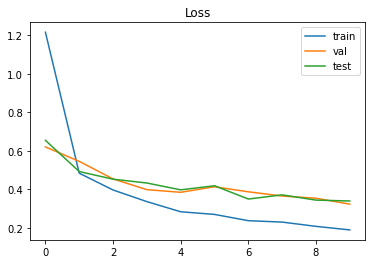

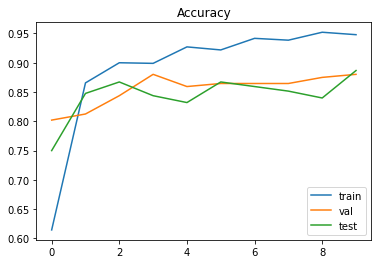

In [ ]:
# Let's train our model
train(pt_alexnet_model, loaders2, optimizer, criterion, epochs = 10, dev = dev)

###AlexNet as features exctrator

In [ ]:
# Define our custom Alexnet version

class FineTunedAlexNet(nn.Module):
  # Constructor
  def __init__(self, in_size=3, out_size=10):
    # Call paretn constructor
    super().__init__()
    alexnet = models.alexnet(pretrained = True)
    # feature extractor from AlexNet
    self.features = alexnet.features
    self.fc = nn.Sequential(
        nn.Linear(in_features=9216, out_features=4096),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(in_features=4096, out_features=1024),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(in_features=1024, out_features=10)
    )
  # Forward
  def forward(self, x):
    x = self.features(x)
    x = x.view(x.size(0), -1)
    output = self.fc(x)
    return output

In [ ]:
finetuned_alexnet_model = FineTunedAlexNet()
print(finetuned_alexnet_model)

FineTunedAlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, o

In [ ]:
# freeze the parameters of the feature extractor part
for param in finetuned_alexnet_model.features.parameters():
  param.requires_grad = False

In [ ]:
# Define an optimizer
optimizer = optim.SGD(finetuned_alexnet_model.fc.parameters(), lr = 0.01)
# Define a loss
criterion = nn.CrossEntropyLoss()

FineTunedAlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, o

train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1: TrL=2.1817, TrA=0.2146, VL=1.9673, VA=0.5625, TeL=1.9514, TeA=0.6094,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2: TrL=1.7964, TrA=0.5104, VL=1.5810, VA=0.6667, TeL=1.5487, TeA=0.6758,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3: TrL=1.3811, TrA=0.6906, VL=1.2001, VA=0.6979, TeL=1.1656, TeA=0.7148,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4: TrL=1.0398, TrA=0.7469, VL=0.9440, VA=0.7656, TeL=0.8886, TeA=0.7734,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5: TrL=0.8158, TrA=0.8063, VL=0.7618, VA=0.7865, TeL=0.7458, TeA=0.7656,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6: TrL=0.6549, TrA=0.8490, VL=0.6300, VA=0.8333, TeL=0.5758, TeA=0.8242,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7: TrL=0.5374, TrA=0.8594, VL=0.5296, VA=0.8698, TeL=0.5133, TeA=0.8242,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8: TrL=0.4493, TrA=0.8958, VL=0.4733, VA=0.8698, TeL=0.4649, TeA=0.8555,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9: TrL=0.3872, TrA=0.9073, VL=0.4243, VA=0.8958, TeL=0.5029, TeA=0.8047,


train:   0%|          | 0/15 [00:00<?, ?it/s]

val:   0%|          | 0/3 [00:00<?, ?it/s]

test:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10: TrL=0.3226, TrA=0.9271, VL=0.3753, VA=0.9010, TeL=0.4589, TeA=0.8633,


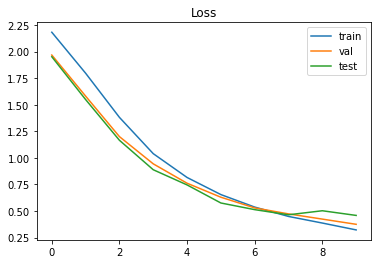

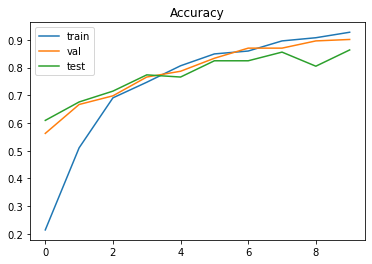

In [ ]:
# Let's train our model
train(finetuned_alexnet_model, loaders2, optimizer, criterion, epochs = 10, dev = dev)